In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
df_movie = pd.read_csv("Expanded_data/big_data_final.tsv",sep='\t')
print(df_movie.shape)
df_movie.head()

C:\Users\rache\AppData\Local\Temp\ipykernel_23932\1739072153.py:1: DtypeWarning: Columns (0,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movie = pd.read_csv("Expanded_data/big_data_final.tsv",sep='\t')


(9377944, 13)


,Freebase movie ID,IMDB_id,Movie box office revenue,Movie genres names,Movie name,Movie release date,averageRating,budget,numVotes,prod_country,inflation coeff,inflation corrected revenue,inflation corrected budget
0,/m/0100_m55,tt0138297,NaN,"['Comedy', 'Sci-Fi']",Urban Animals,1987.0,5.2,NaN,79.0,NaN,2.384772,NaN,NaN
1,/m/0100_mnm,tt0202813,NaN,['Comedy'],NaN,1999.0,5.8,NaN,15.0,NaN,1.626713,NaN,NaN
2,/m/0100_nzr,tt0184302,NaN,['Drama'],NaN,1999.0,4.8,NaN,119.0,NaN,1.626713,NaN,NaN
3,/m/0100_pgp,tt0094831,NaN,['Comedy'],NaN,1988.0,6.8,NaN,103.0,NaN,2.291337,NaN,NaN
4,/m/0100_pz9,tt0088884,NaN,['Comedy'],NaN,1985.0,2.4,NaN,59.0,NaN,2.519087,NaN,NaN


### Genre distribution

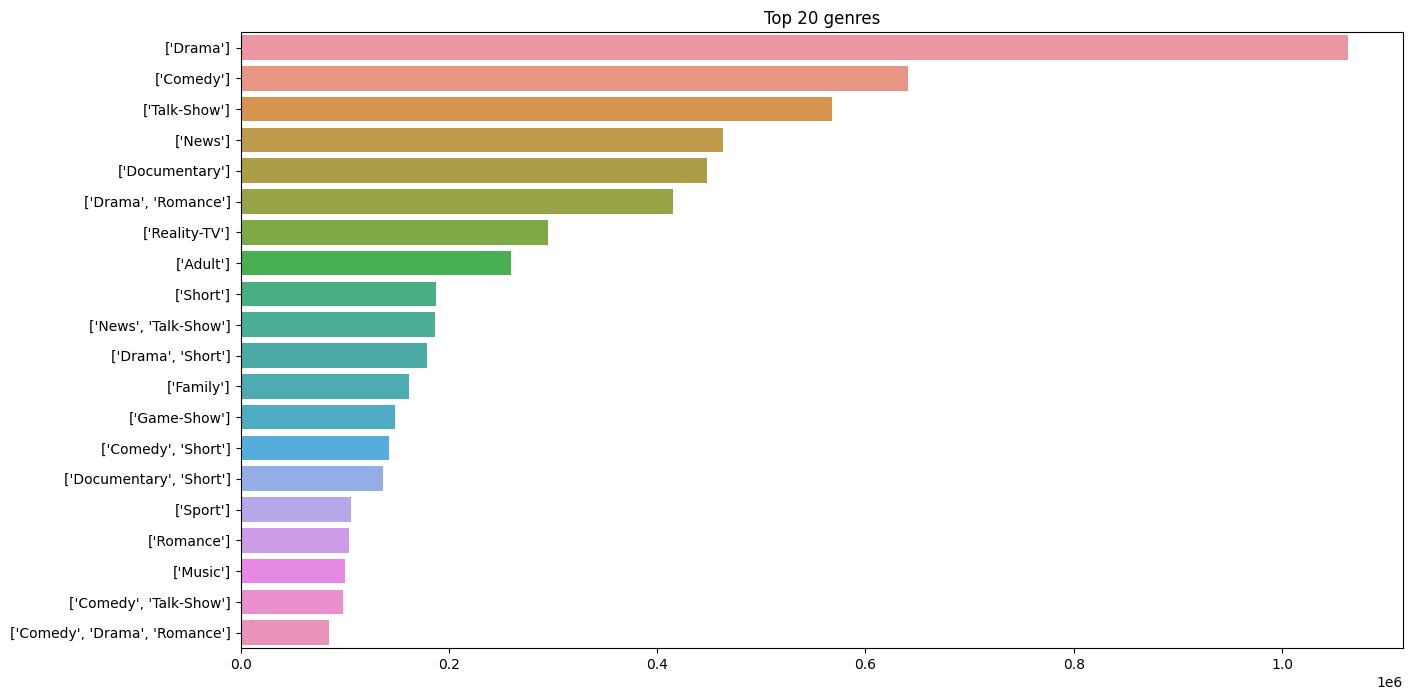

In [3]:
df_genre = df_movie.copy()
df_genre.dropna(subset=['Movie genres names'], inplace=True)

count_genre = df_genre['Movie genres names'].value_counts()

plt.figure(figsize=(15,8))
ax = sns.barplot(x=count_genre.values[0:20], y=count_genre.index[0:20]).set(title='Top 20 genres')
plt.show()

### Year distribution

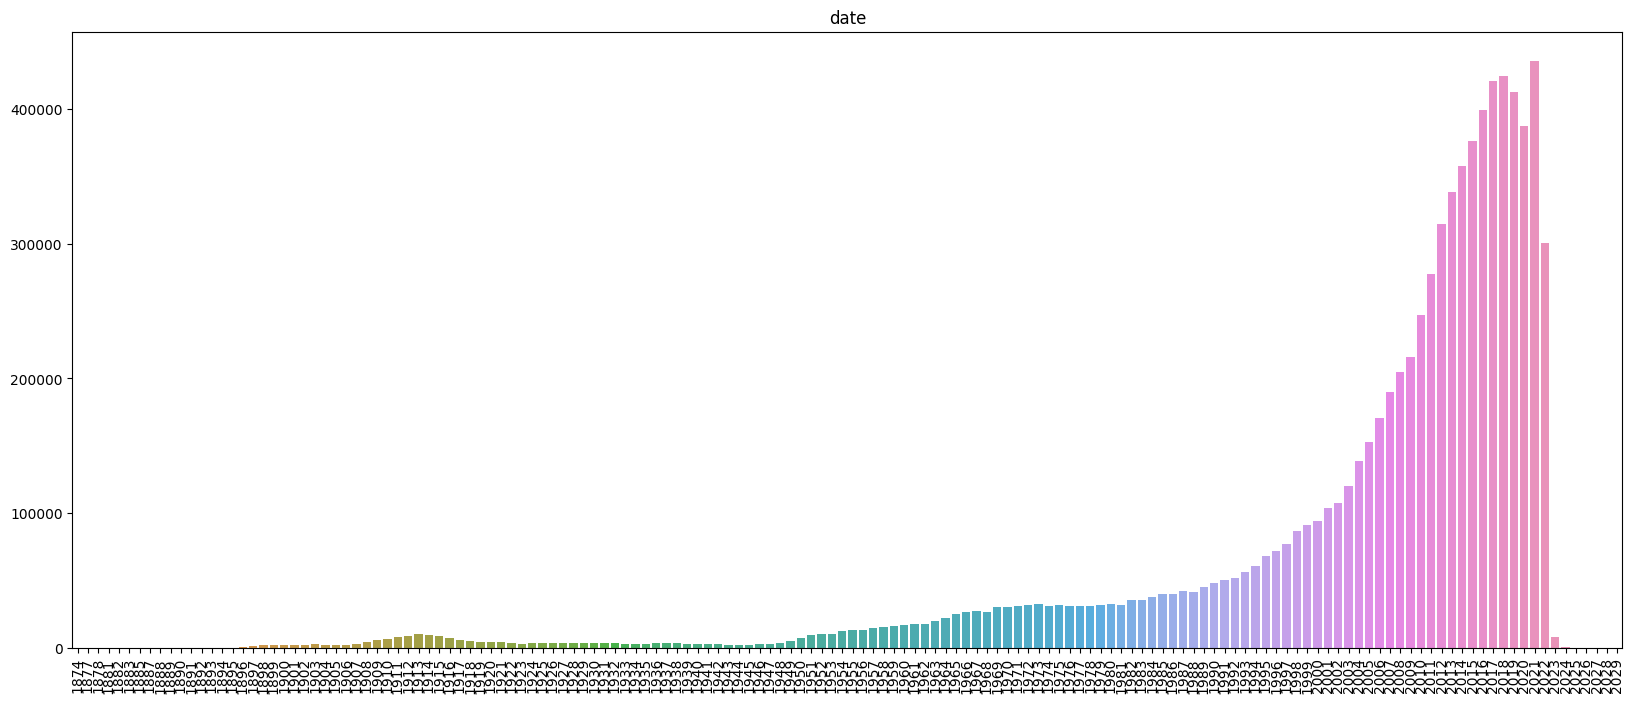

In [8]:
df_date = df_movie[~df_movie['Movie release date'].isna()]

count_per_year = df_date['Movie release date'].value_counts()
plt.figure(figsize=(20,8))
ax = sns.barplot(x=count_per_year.index.astype('int64'), y=count_per_year.values).set(title='date')
plt.xticks(rotation='vertical')
plt.show()

In [9]:
print(count_per_year[1896])
print(count_per_year[1897])
print(count_per_year[2023])
print(count_per_year[2024])

# 1897 : more than 1000 movies until 2023

900
1372
8291
442


### Genre per year

In [ ]:
#remove nan
df_genre_date = df_date[~df_date['genre1'].isna()]
#remove '\N' 
df_genre_date = df_genre_date[df_genre_date.genre1 != "\\N"]

MemoryError: Unable to allocate 296. MiB for an array with shape (5, 7753778) and data type object

In [ ]:
df_genre_date.groupby(['Movie release year', 'genre1']).size().unstack().plot(kind='bar', stacked=True)
#illisible

In [ ]:
# Plot relative number of genres per year

cross_tab_prop = pd.crosstab(index=df_genre_date['Movie release year'],
                             columns=df_genre_date['genre1'],
                             normalize="index")
cross_tab_prop

In [ ]:
cross_tab = pd.crosstab(index=df_genre_date['Movie release year'],
                        columns=df_genre_date['genre1'])
cross_tab

In [ ]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True,  
                    figsize=(50, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Movie release year")
plt.ylabel("Proportion")
plt.show()

#### Genre per year (retirer valeurs rares)

In [ ]:
# Reduce number of genres (otherwise not lisibe on the graphs)
thr_genre = 300000 #minimal number of movies with a certain genre

# Select the values where the count is less than 3 (or 5 if you like)
to_remove = count_genre[count_genre <= thr_genre].index

# Keep rows where the city column is not in to_remove
df_genre_date_thr = df_genre_date[~df_genre_date.genre1.isin(to_remove)]

In [ ]:
# print only from 1897 (more than 1000 movies)
df_genre_date_thr = df_genre_date_thr[df_genre_date_thr['Movie release year']>=1897]
df_genre_date_thr = df_genre_date_thr[df_genre_date_thr['Movie release year']<=2023]

cross_tab_prop = pd.crosstab(index=df_genre_date_thr['Movie release year'],
                             columns=df_genre_date_thr['genre1'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True,
                    colormap='tab20',
                    figsize=(50, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Movie release year")
plt.ylabel("Proportion")
plt.show()

# Rating, Revenue and Budget
To determine the success of a movie, we want to consider their box office revenue, the budget and the rating. Therefore, we have to analyse the relationship between these features.
The budgets and the revenues are corrected by considering the inflation. 

In [81]:
#Revenue vs. Rating
revenue_rating = df_movie.copy()
revenue_rating = revenue_rating.dropna(subset=['inflation corrected revenue', 'averageRating'])

years_rr = revenue_rating['Movie release date'].unique()
mean_revenue_rr = np.zeros_like(years_rr)
median_revenue_rr = np.zeros_like(years_rr)
mean_rating_rr = np.zeros_like(years_rr)
median_rating_rr = np.zeros_like(years_rr)
for i,y in enumerate(years_rr):
    
    rev = revenue_rating.loc[revenue_rating['Movie release date'] == y]['inflation corrected revenue']
    rat = revenue_rating.loc[revenue_rating['Movie release date'] == y]['averageRating']
    
    mean = np.mean(rev)
    median = np.median(rev)
    mean_revenue_rr[i] = mean
    median_revenue_rr[i] = median
    
    mean = np.mean(rat)
    median = np.median(rat)
    mean_rating_rr[i] = mean
    median_rating_rr[i] = median

In [82]:
#Revenue vs. Budget
revenue_budget = df_movie.copy()
revenue_budget = revenue_budget.dropna(subset=['inflation corrected revenue', 'inflation corrected budget'])

years_rb = revenue_budget['Movie release date'].unique()
mean_revenue_rb = np.zeros_like(years_rb)
median_revenue_rb = np.zeros_like(years_rb)
mean_budget_rb = np.zeros_like(years_rb)
median_budget_rb = np.zeros_like(years_rb)
for i,y in enumerate(years_rb):
    
    rev = revenue_budget.loc[revenue_budget['Movie release date'] == y]['inflation corrected revenue']
    bud = revenue_budget.loc[revenue_budget['Movie release date'] == y]['inflation corrected budget']
    
    mean = np.mean(rev)
    median = np.median(rev)
    mean_revenue_rb[i] = mean
    median_revenue_rb[i] = median
    
    mean = np.mean(bud)
    median = np.median(bud)
    mean_budget_rb[i] = mean
    median_budget_rb[i] = median

In [83]:
# Rating vs. Budget
rating_budget = df_movie.copy()
rating_budget = rating_budget.dropna(subset=['averageRating', 'inflation corrected budget'])

years_rab = rating_budget['Movie release date'].unique()
mean_rating_rab = np.zeros_like(years_rab)
median_rating_rab = np.zeros_like(years_rab)
mean_budget_rab = np.zeros_like(years_rab)
median_budget_rab = np.zeros_like(years_rab)
for i,y in enumerate(years_rab):
    
    rat = rating_budget.loc[rating_budget['Movie release date'] == y]['averageRating']
    bud = rating_budget.loc[rating_budget['Movie release date'] == y]['inflation corrected budget']
    
    mean = np.mean(rat)
    median = np.median(rat)
    mean_rating_rab[i] = mean
    median_rating_rab[i] = median
    
    mean = np.mean(bud)
    median = np.median(bud)
    mean_budget_rab[i] = mean
    median_budget_rab[i] = median

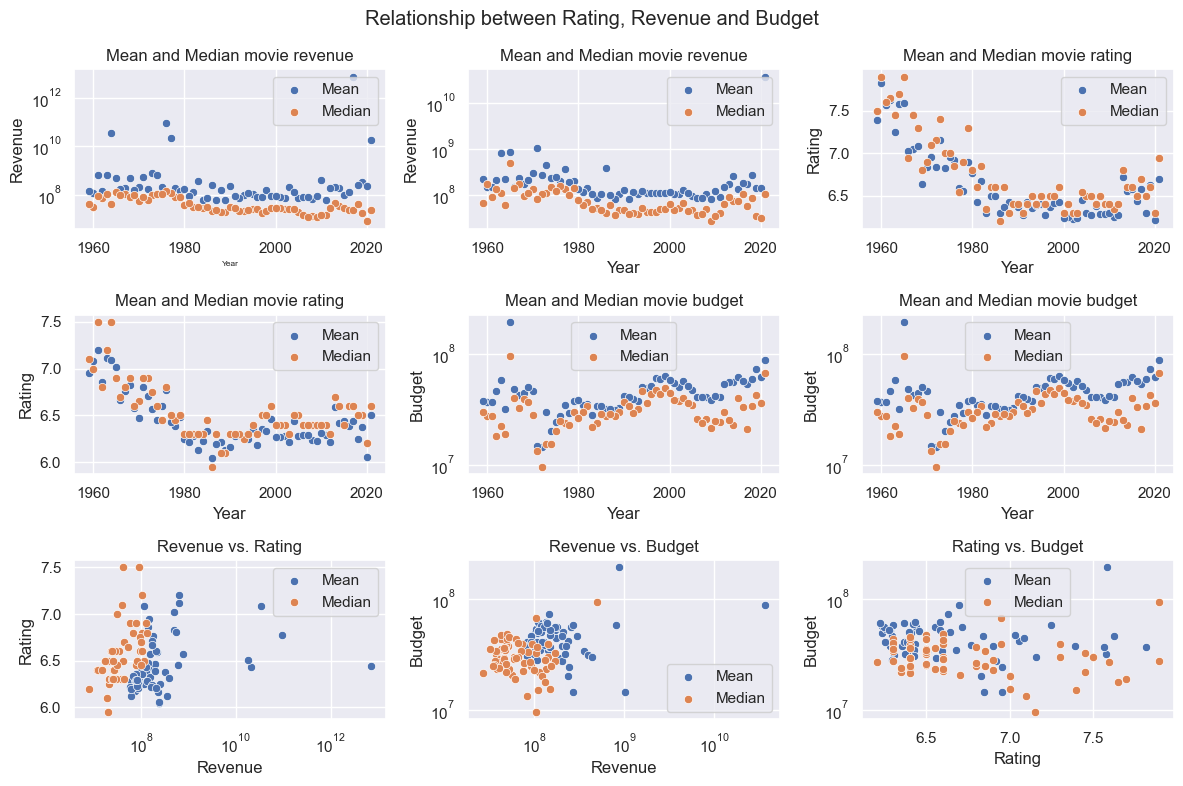

In [148]:
fig, ax = plt.subplots(3, 3, figsize=(12,8))
fig.suptitle('Relationship between Rating, Revenue and Budget')

# Revenue vs. Rating
fig00=sns.scatterplot(ax = ax[0,0],x=years_rr, y=mean_revenue_rr,label='Mean')
fig00=sns.scatterplot(ax = ax[0,0],x=years_rr, y=median_revenue_rr,label='Median')
fig00.set(yscale="log")
ax[0,0].set_title('Mean and Median movie revenue')
fig00.set_xlabel('Year', fontsize = 6)
fig00.set_ylabel('Revenue')

fig10=sns.scatterplot(ax = ax[1,0], x=years_rr, y=mean_rating_rr,label='Mean')
fig10=sns.scatterplot(ax = ax[1,0], x=years_rr, y=median_rating_rr,label='Median')
ax[1,0].set_title('Mean and Median movie rating')
fig10.set_xlabel('Year')
fig10.set_ylabel('Rating')

fig20=sns.scatterplot(ax = ax[2,0], x=mean_revenue_rr, y=mean_rating_rr,label='Mean')
fig20=sns.scatterplot(ax = ax[2,0], x=median_revenue_rr, y=median_rating_rr,label='Median')
ax[2,0].set_title('Revenue vs. Rating')
fig20.set(xscale="log")
fig20.set_xlabel('Revenue')
fig20.set_ylabel('Rating')

# Revenue vs. Budget
fig01=sns.scatterplot(ax = ax[0,1],x=years_rb, y=mean_revenue_rb,label='Mean')
fig01=sns.scatterplot(ax = ax[0,1],x=years_rb, y=median_revenue_rb,label='Median')
fig01.set(yscale="log")
ax[0,1].set_title('Mean and Median movie revenue')
fig01.set_xlabel('Year')
fig01.set_ylabel('Revenue')

fig11=sns.scatterplot(ax = ax[1,1], x=years_rb, y=mean_budget_rb,label='Mean')
fig11 = sns.scatterplot(ax = ax[1,1], x=years_rb, y=median_budget_rb,label='Median')
fig11.set(yscale="log")
ax[1,1].set_title('Mean and Median movie budget')
fig11.set_xlabel('Year')
fig11.set_ylabel('Budget')

fig21=sns.scatterplot(ax = ax[2,1], x=mean_revenue_rb, y=mean_budget_rb,label='Mean')
fig21=sns.scatterplot(ax = ax[2,1], x=median_revenue_rb, y=median_budget_rb,label='Median')
ax[2,1].set_title('Revenue vs. Budget')
fig21.set(xscale="log")
fig21.set(yscale="log")
fig21.set_xlabel('Revenue')
fig21.set_ylabel('Budget')

# Rating vs. Budget
fig02=sns.scatterplot(ax = ax[0,2],x=years_rab, y=mean_rating_rab,label='Mean')
fig02=sns.scatterplot(ax = ax[0,2],x=years_rab, y=median_rating_rab,label='Median')
ax[0,2].set_title('Mean and Median movie rating')
fig02.set_xlabel('Year')
fig02.set_ylabel('Rating')

fig12=sns.scatterplot(ax = ax[1,2], x=years_rab, y=mean_budget_rab,label='Mean')
fig12 = sns.scatterplot(ax = ax[1,2], x=years_rab, y=median_budget_rab,label='Median')
fig12.set(yscale="log")
ax[1,2].set_title('Mean and Median movie budget')
fig12.set_xlabel('Year')
fig12.set_ylabel('Budget')

fig22=sns.scatterplot(ax = ax[2,2], x=mean_rating_rab, y=mean_budget_rab,label='Mean')
fig22=sns.scatterplot(ax = ax[2,2], x=median_rating_rab, y=median_budget_rab,label='Median')
ax[2,2].set_title('Rating vs. Budget')
fig22.set(yscale="log")
fig22.set_xlabel('Rating')
fig22.set_ylabel('Budget')

fig.tight_layout() 


In [141]:
print(f'Pearson correlation between the mean of revenue and the mean of rating: {stats.pearsonr(mean_revenue_rr,mean_rating_rr)}')
print(f'Pearson correlation between the median of revenue and the median of rating: {stats.pearsonr(median_revenue_rr,median_rating_rr)}\n')

print(f'Pearson correlation between the mean of revenue and the mean of budget: {stats.pearsonr(mean_revenue_rb,mean_budget_rb)}')
print(f'Pearson correlation between the median of revenue and the median of budget: {stats.pearsonr(median_revenue_rb,median_budget_rb)}\n')

print(f'Pearson correlation between the mean of rating and the mean of budget: {stats.pearsonr(mean_rating_rab,mean_budget_rab)}')
print(f'Pearson correlation between the median of rating and the median of budget: {stats.pearsonr(median_rating_rab,median_budget_rab)}')

Pearson correlation between the mean of revenue and the mean of rating: (0.0037690648999040167, 0.9766117291217751)
Pearson correlation between the median of revenue and the median of rating: (0.5345058424937269, 6.414122291842158e-06)

Pearson correlation between the mean of revenue and the mean of budget: (0.2413787628531989, 0.05667565728783349)
Pearson correlation between the median of revenue and the median of budget: (0.4214180215223112, 0.0005825398420519009)

Pearson correlation between the mean of rating and the mean of budget: (0.11013096349258317, 0.3902021676321296)
Pearson correlation between the median of rating and the median of budget: (-0.01028190497335666, 0.9362548057427648)


## An overview of rating and revenue

The rating is represented in the column 'averageRating' and it ranges from 0 to 10, where 10 is the best score and 0 is the lowest.

Since we want to consider both the rating and the revenu at the same time, we remove the rows that have NaN in the column 'averageRating' or 'Movie box office revenue'.

In [10]:
revenue = df_movie.copy()
revenue = revenue.dropna(subset=['Movie box office revenue', 'averageRating'])
#revenue = revenue[revenue['Movie box office revenue'].notna()]
#revenue = revenue[revenue['averageRating'].notna()]

In [11]:
revenue['averageRating'].describe()

count    9575.000000
mean        6.352324
std         1.022347
min         1.000000
25%         5.800000
50%         6.400000
75%         7.000000
max         9.300000
Name: averageRating, dtype: float64

In [12]:
revenue.head()

,Freebase movie ID,IMDB_id,Movie box office revenue,Movie genres names,Movie name,Movie release date,averageRating,budget,numVotes,prod_country,inflation coeff,inflation corrected revenue,inflation corrected budget
9,/m/0100blym,tt1441953,1800000.0,"['Biography', 'Drama', 'History']",Testament of Youth,2014.0,7.2,NaN,29155.0,GB,1.144606,2.060292e+06,NaN
33,/m/0100khzv,tt2802154,4100000.0,"['Crime', 'Drama']",Leviathan,2014.0,7.6,4000000.0,53841.0,RU,1.144606,4.692887e+06,4.578426e+06
231,/m/0105j_71,tt3079380,235700000.0,"['Action', 'Comedy']",Spy,2015.0,7.0,65000000.0,245850.0,US,1.143250,2.694641e+08,7.431127e+07
303,/m/0106bp29,tt3286560,1200000.0,"['Drama', 'Romance', 'War']",The Last Face,2016.0,4.9,NaN,5158.0,US,1.129007,1.354808e+06,NaN
465,/m/0109gmqq,tt3013602,1080000.0,['Comedy'],Babysitting,2014.0,6.7,3400000.0,10759.0,NaN,1.144606,1.236175e+06,3.891662e+06


### Plots

Let's plot the variables!

In [13]:
years = revenue['Movie release date'].unique()
mean_revenue = np.zeros_like(years)
median_revenue = np.zeros_like(years)
mean_rating = np.zeros_like(years)
median_rating = np.zeros_like(years)
for i,y in enumerate(years):
    
    rev = revenue.loc[revenue['Movie release date'] == y]['Movie box office revenue']
    rat = revenue.loc[revenue['Movie release date'] == y]['averageRating']
    
    mean = np.mean(rev)
    median = np.median(rev)
    mean_revenue[i] = mean
    median_revenue[i] = median
    
    mean = np.mean(rat)
    median = np.median(rat)
    mean_rating[i] = mean
    median_rating[i] = median

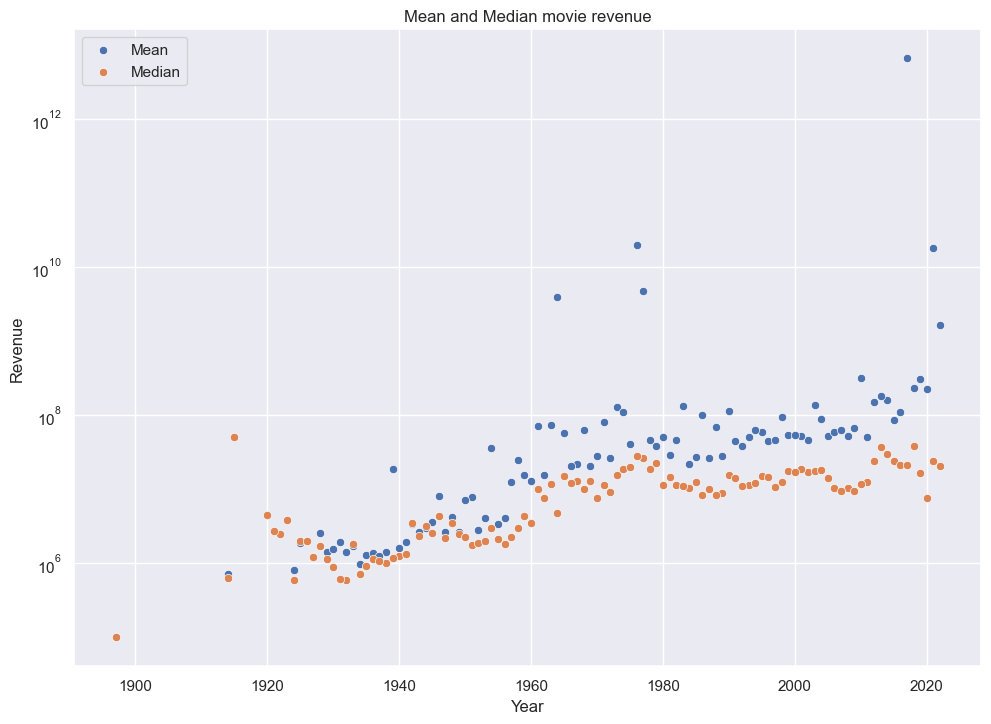

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(x=years, y=mean_revenue,label='Mean')
splot = sns.scatterplot(x=years, y=median_revenue,label='Median')
splot.set(yscale="log")
plt.title('Mean and Median movie revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

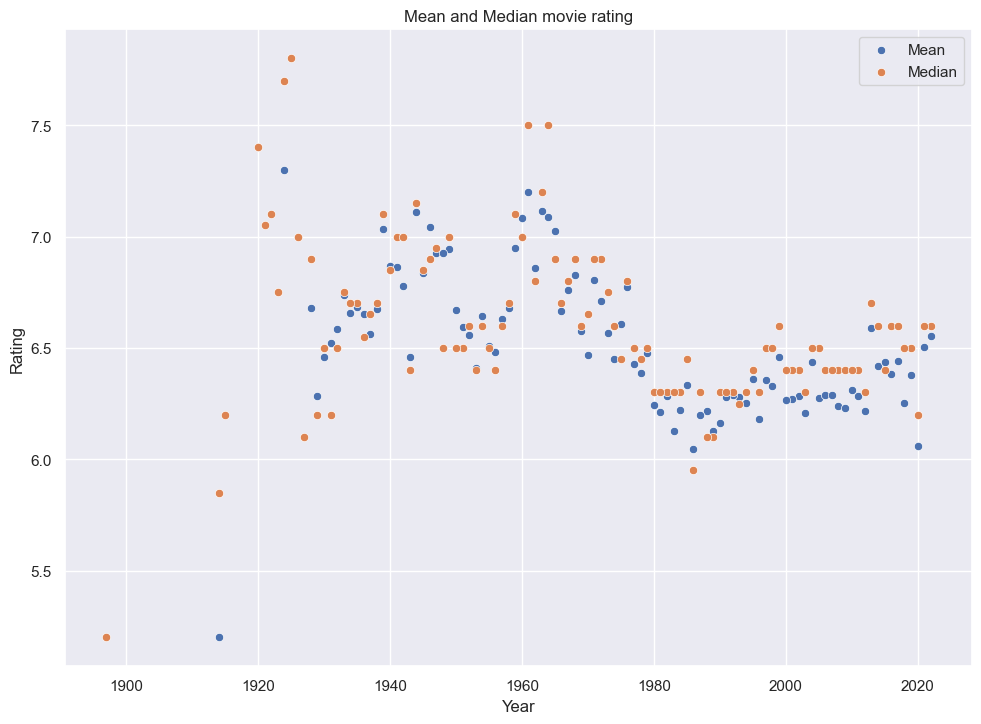

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(x=years, y=mean_rating,label='Mean')
splot = sns.scatterplot(x=years, y=median_rating,label='Median')
plt.title('Mean and Median movie rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

Let's try to do some statistics. It seems that the mean rating and the mean revenue are not linearly correlated. The median values seem to be significantly correlated but the coefficient is quite small (-0.2).

In [17]:
stats.pearsonr(mean_rating,mean_revenue)

(-0.0243641609838837, 0.8042064089301088)

In [18]:
stats.pearsonr(median_rating,median_revenue)

(-0.2031754761640116, 0.0367206084808511)

In order to really draw conclusion we should take into consideration the inflation!

In [19]:
inflation_revenue = revenue.dropna(subset=['inflation coeff'])

In [20]:
inflation_years = inflation_revenue['Movie release date'].unique()
inflation_mean_revenue = np.zeros_like(inflation_years)
inflation_median_revenue = np.zeros_like(inflation_years)
inflation_mean_rating = np.zeros_like(inflation_years)
inflation_median_rating = np.zeros_like(inflation_years)
for i,y in enumerate(inflation_years):
    
    rev = inflation_revenue.loc[inflation_revenue['Movie release date'] == y]['inflation corrected revenue']
    rat = inflation_revenue.loc[inflation_revenue['Movie release date'] == y]['averageRating']
    
    mean = np.mean(rev)
    median = np.median(rev)
    inflation_mean_revenue[i] = mean
    inflation_median_revenue[i] = median
    
    mean = np.mean(rat)
    median = np.median(rat)
    inflation_mean_rating[i] = mean
    inflation_median_rating[i] = median

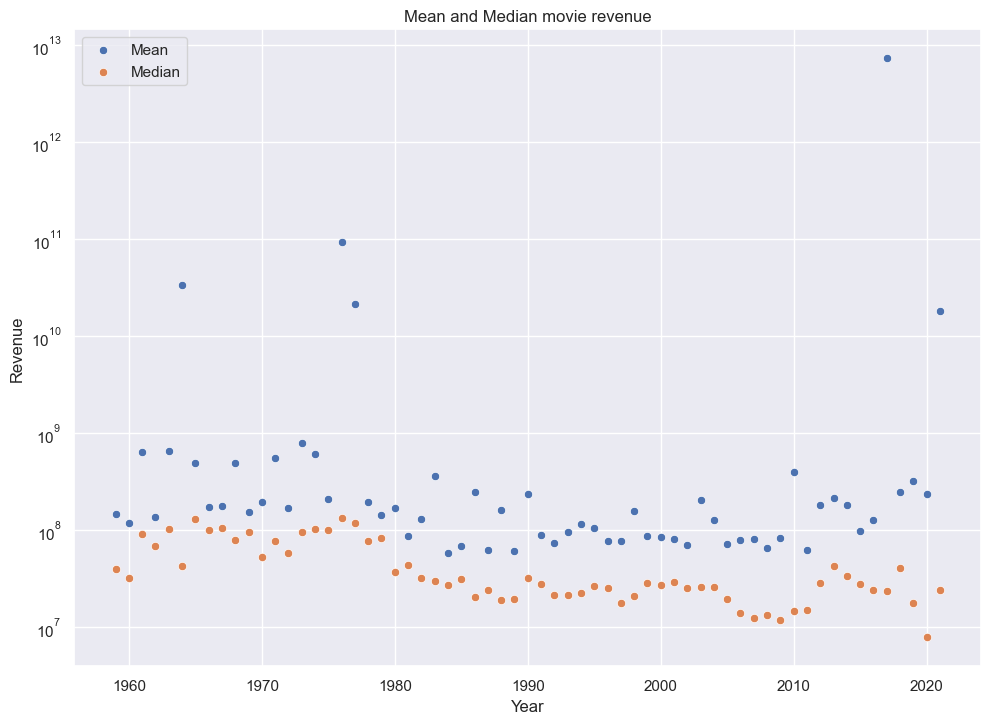

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(x=inflation_years, y=inflation_mean_revenue,label='Mean')
splot = sns.scatterplot(x=inflation_years, y=inflation_median_revenue,label='Median')
splot.set(yscale="log")
plt.title('Mean and Median movie revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

The plot of the revenues corrected with inflation now shows us a more flat regime that without inflation. We can clearly identify some outlines. As a future study it can be nice to analyse which these movies are and why they have such a high revenue.

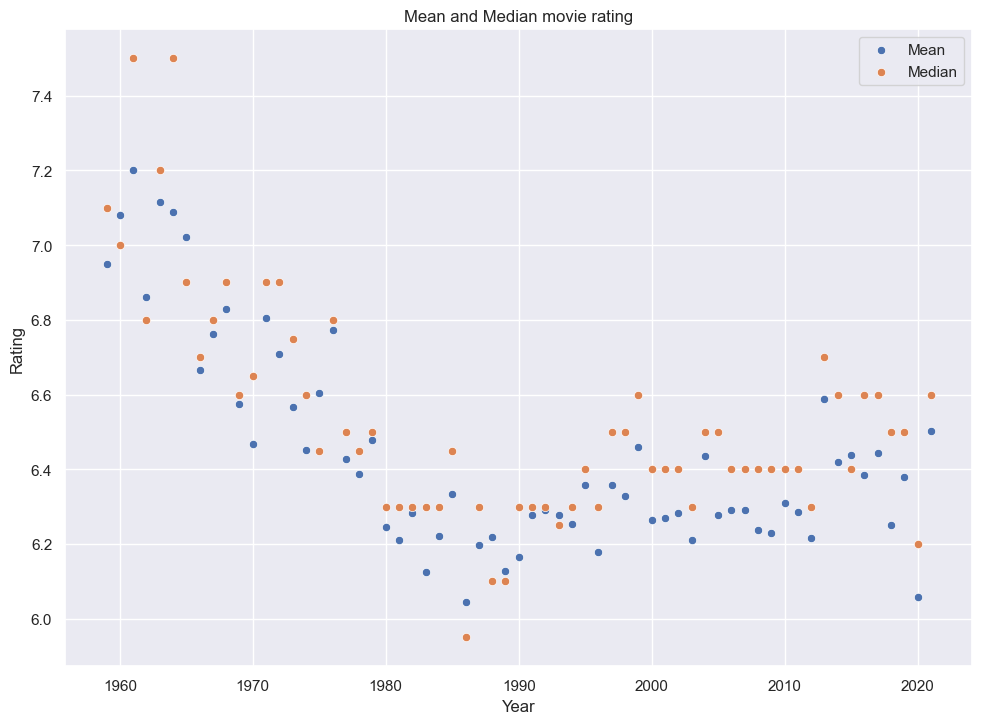

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(x=inflation_years, y=inflation_mean_rating,label='Mean')
splot = sns.scatterplot(x=inflation_years, y=inflation_median_rating,label='Median')
plt.title('Mean and Median movie rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

Let's try to do some statistics on the corrected revenues. It seems that the mean rating and the mean revenue are not linearly correlated. The median values seem to be significantly correlated with a quite high coefficient (0.54). This gives us the idea that the high revenue is correlated with high rating.

In [23]:
stats.pearsonr(inflation_mean_rating,inflation_mean_revenue)

(0.0037690648999040167, 0.9766117291217751)

In [24]:
stats.pearsonr(inflation_median_rating,inflation_median_revenue)

(0.5345058424937269, 6.414122291842158e-06)

## An overview of rating and budget

We want to analyse if the budget and the rating score are correlated.

In [38]:
budget_rating = df_movie.copy()
budget_rating = budget_rating.dropna(subset=['budget', 'averageRating'])


In [41]:
years = budget_rating['Movie release date'].unique()
mean_budget = np.zeros_like(years)
median_budget = np.zeros_like(years)
mean_rating = np.zeros_like(years)
median_rating = np.zeros_like(years)
for i,y in enumerate(years):
    
    bud = budget_rating.loc[budget_rating['Movie release date'] == y]['budget']
    rat = budget_rating.loc[budget_rating['Movie release date'] == y]['averageRating']
    
    mean = np.mean(bud)
    median = np.median(bud)
    mean_budget[i] = mean
    median_budget[i] = median
    
    mean = np.mean(rat)
    median = np.median(rat)
    mean_rating[i] = mean
    median_rating[i] = median

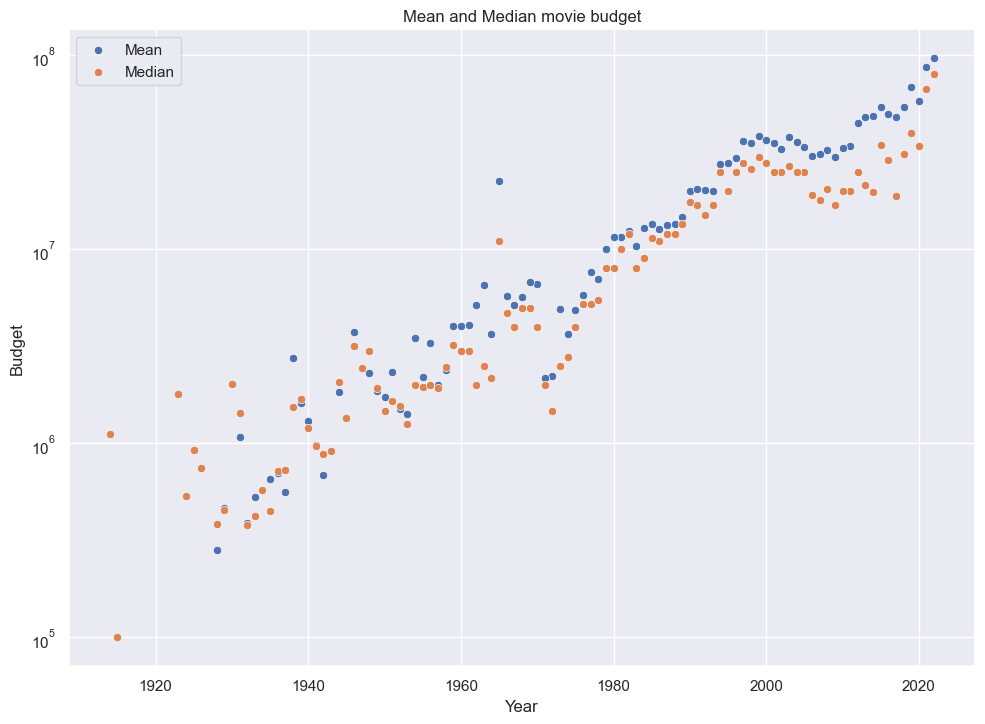

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(x=years, y=mean_budget,label='Mean')
splot = sns.scatterplot(x=years, y=median_budget,label='Median')
splot.set(yscale="log")
plt.title('Mean and Median movie budget')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.show()

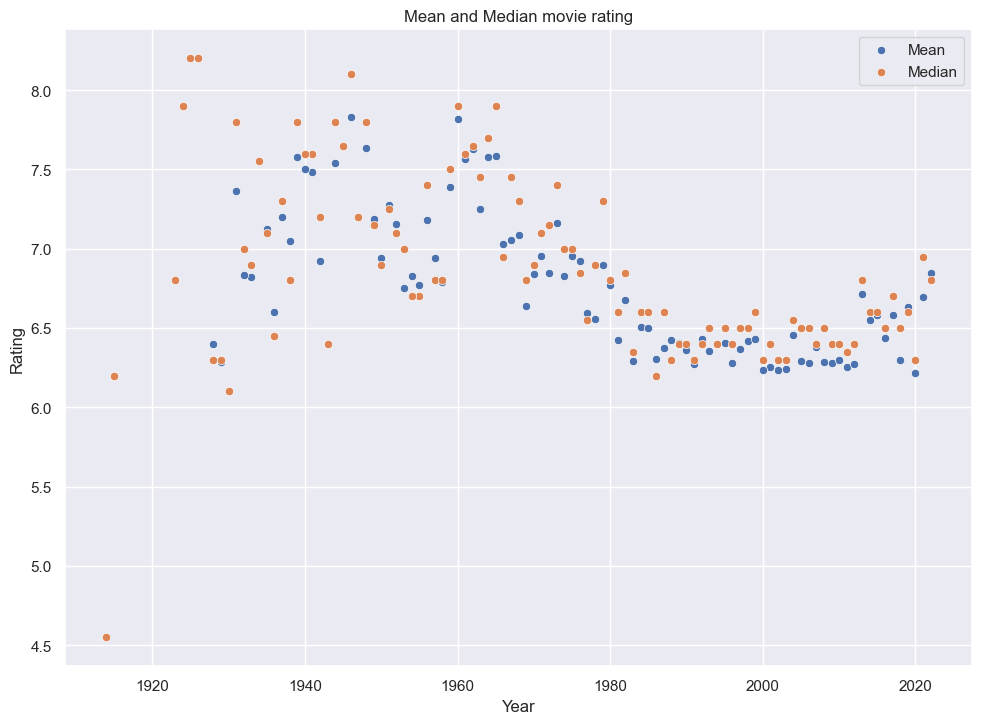

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(x=years, y=mean_rating,label='Mean')
splot = sns.scatterplot(x=years, y=median_rating,label='Median')
plt.title('Mean and Median movie rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [52]:
print(f'Pearson correlation between the mean of rating and the mean of budget: {stats.pearsonr(mean_rating,mean_budget)}')
print(f'Pearson correlation between the median of rating and the median of budget: {stats.pearsonr(median_rating,median_budget)}')

Pearson correlation between the mean of rating and the mean of budget: (-0.4014097909076749, 3.178640752012932e-05)
Pearson correlation between the median of rating and the median of budget: (-0.3689506457988959, 0.0001466874375292228)


The negative correlation between the budget and the rating is perceived. In both case, they are significant.

We consider now the inflation:

In [45]:
budget_rating_inflation = df_movie.copy()
budget_rating_inflation = budget_rating_inflation.dropna(subset=['inflation corrected budget', 'averageRating'])

In [48]:
years_inflation = budget_rating_inflation['Movie release date'].unique()
mean_budget_inflation = np.zeros_like(years_inflation)
median_budget_inflation = np.zeros_like(years_inflation)
mean_rating_inflation = np.zeros_like(years_inflation)
median_rating_inflation = np.zeros_like(years_inflation)
for i,y in enumerate(years_inflation):
    
    bud = budget_rating.loc[budget_rating['Movie release date'] == y]['inflation corrected budget']
    rat = budget_rating.loc[budget_rating['Movie release date'] == y]['averageRating']
    
    mean = np.mean(bud)
    median = np.median(bud)
    mean_budget_inflation[i] = mean
    median_budget_inflation[i] = median
    
    mean = np.mean(rat)
    median = np.median(rat)
    mean_rating_inflation[i] = mean
    median_rating_inflation[i] = median

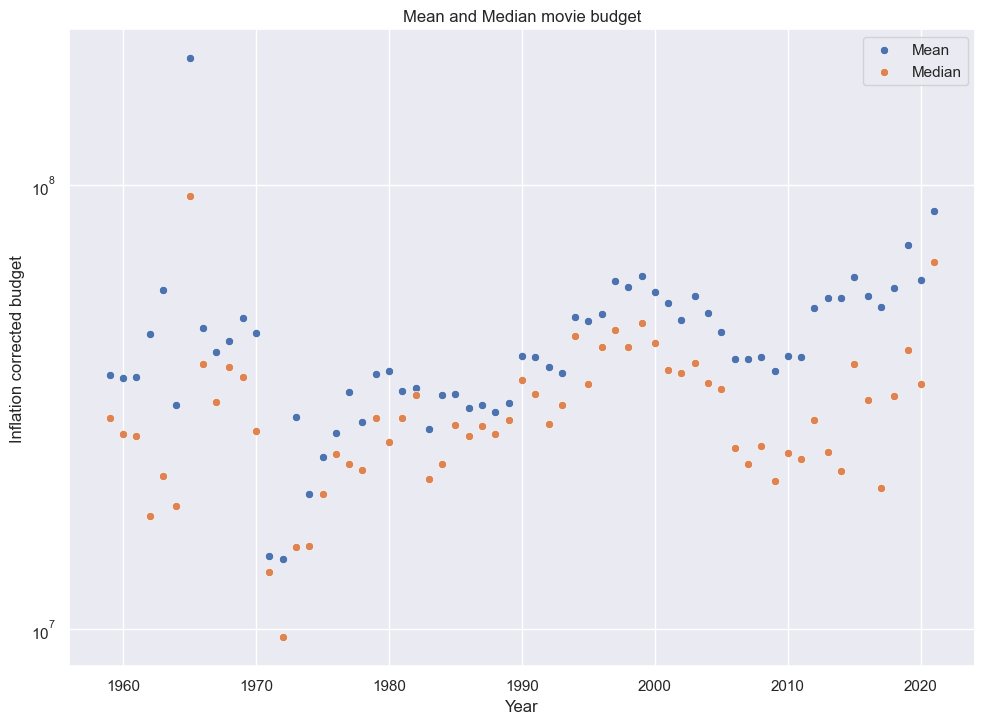

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(x=years_inflation, y=mean_budget_inflation,label='Mean')
splot = sns.scatterplot(x=years_inflation, y=median_budget_inflation,label='Median')
splot.set(yscale="log")
plt.title('Mean and Median movie budget')
plt.xlabel('Year')
plt.ylabel('Inflation corrected budget')
plt.show()

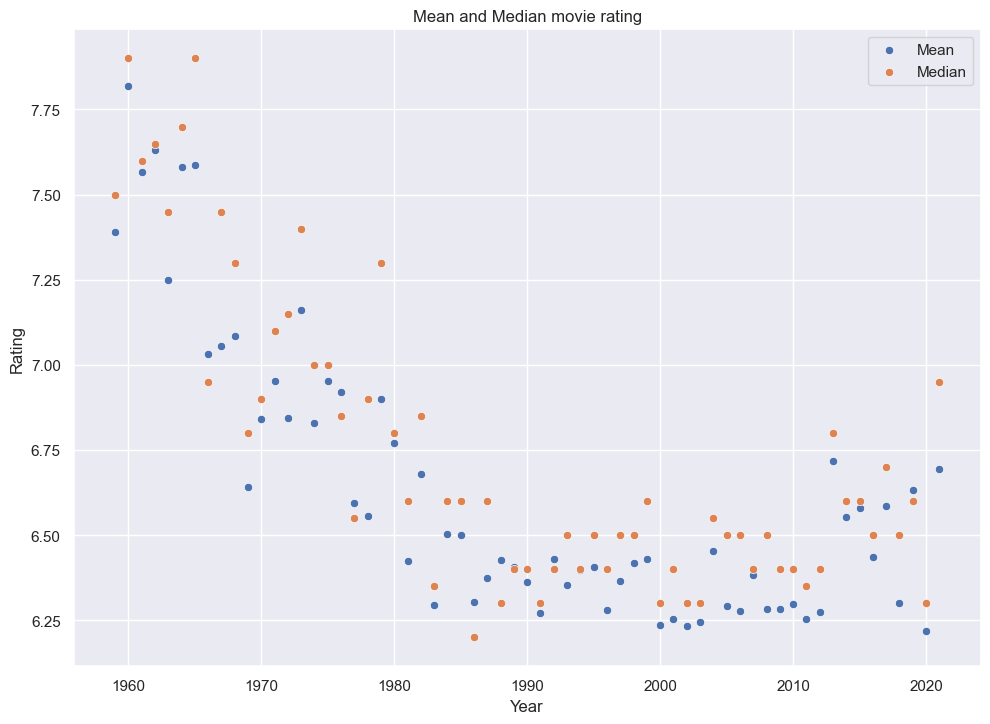

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(x=years_inflation, y=mean_rating_inflation,label='Mean')
splot = sns.scatterplot(x=years_inflation, y=median_rating_inflation,label='Median')
plt.title('Mean and Median movie rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [53]:
print(f'Pearson correlation between the mean of rating and the mean of budget: {stats.pearsonr(mean_rating_inflation,mean_budget_inflation)}')
print(f'Pearson correlation between the median of rating and the median of budget: {stats.pearsonr(median_rating_inflation,median_budget_inflation)}')

Pearson correlation between the mean of rating and the mean of budget: (0.11013096349258317, 0.3902021676321296)
Pearson correlation between the median of rating and the median of budget: (-0.01028190497335666, 0.9362548057427648)


Once the inflation considered, no significant correlation is computed.

## An overview of revenue and budget

We want to analyse if the budget and the revenue are correlated.

In [55]:
budget_revenue = df_movie.copy()
budget_revenue = budget_revenue.dropna(subset=['budget', 'Movie box office revenue'])


In [64]:
years = budget_revenue['Movie release date'].unique()
mean_budget = np.zeros_like(years)
median_budget = np.zeros_like(years)
mean_revenue = np.zeros_like(years)
median_revenue = np.zeros_like(years)
for i,y in enumerate(years):
    
    bud = budget_revenue.loc[budget_revenue['Movie release date'] == y]['budget']
    rev = budget_revenue.loc[budget_revenue['Movie release date'] == y]['Movie box office revenue']
    
    mean = np.mean(bud)
    median = np.median(bud)
    mean_budget[i] = mean
    median_budget[i] = median
    
    mean = np.mean(rev)
    median = np.median(rev)
    mean_revenue[i] = mean
    median_revenue[i] = median

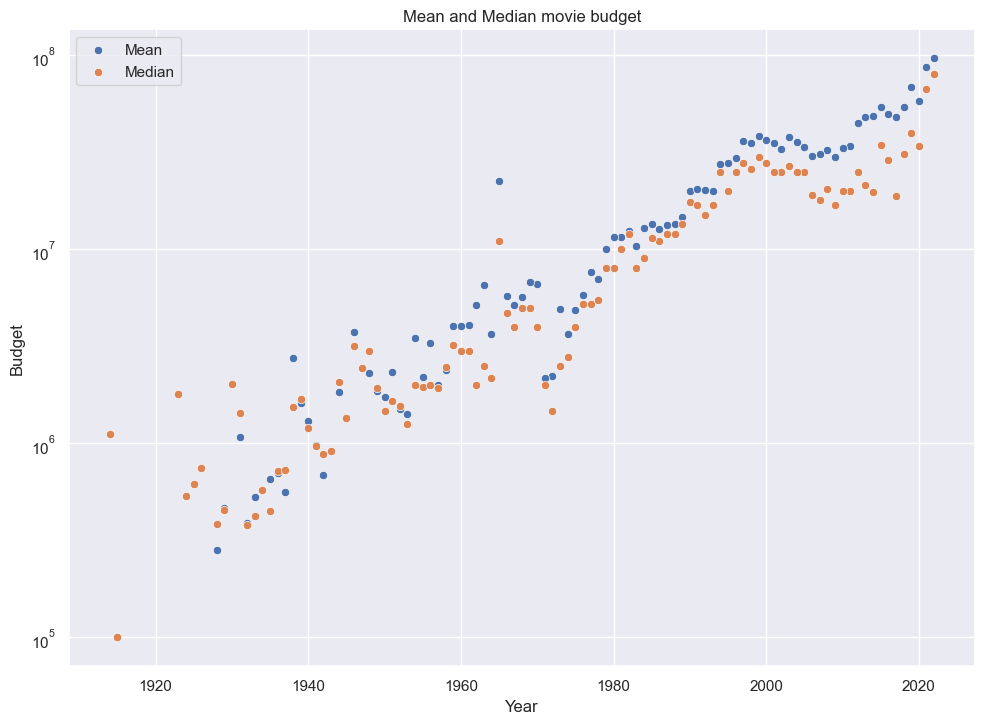

In [65]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(x=years, y=mean_budget,label='Mean')
splot = sns.scatterplot(x=years, y=median_budget,label='Median')
splot.set(yscale="log")
plt.title('Mean and Median movie budget')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.show()

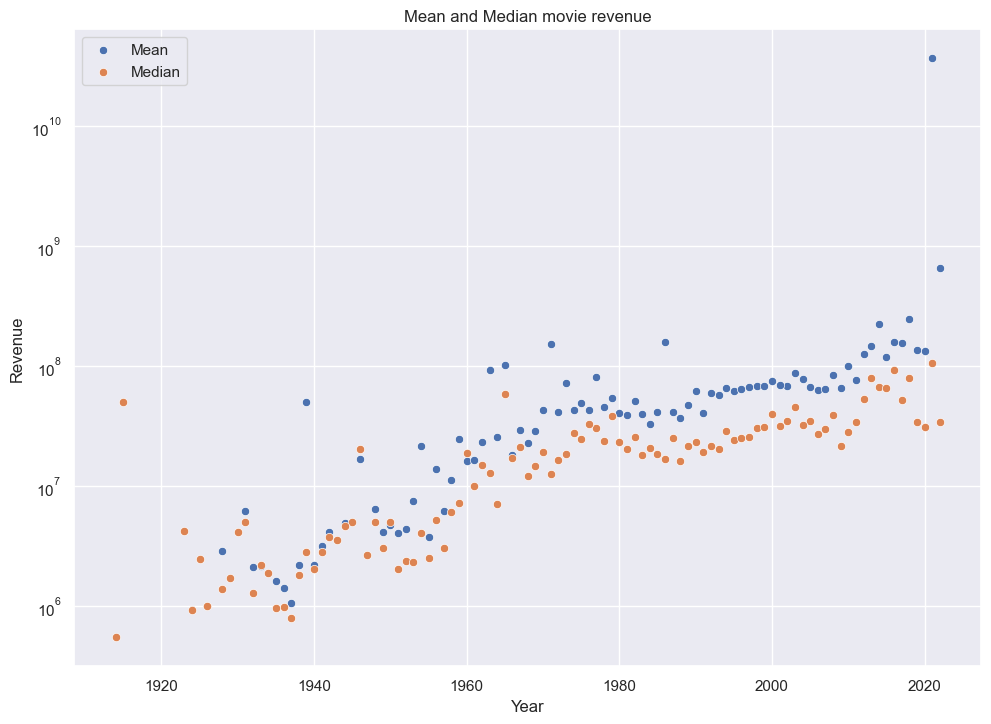

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(x=years, y=mean_revenue,label='Mean')
splot = sns.scatterplot(x=years, y=median_revenue,label='Median')
splot.set(yscale="log")
plt.title('Mean and Median movie revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

In [67]:
print(f'Pearson correlation between the mean of revenue and the mean of budget: {stats.pearsonr(mean_revenue,mean_budget)}')
print(f'Pearson correlation between the median of revenue and the median of budget: {stats.pearsonr(median_revenue,median_budget)}')

Pearson correlation between the mean of revenue and the mean of budget: (0.3733823199790379, 0.00012016275675333612)
Pearson correlation between the median of revenue and the median of budget: (0.7064360611788824, 1.5469515778139328e-16)


With inflation consideration:

In [68]:
budget_revenue_inflation = df_movie.copy()
budget_revenue_inflation = budget_revenue_inflation.dropna(subset=['inflation corrected budget', 'inflation corrected revenue'])

In [70]:
years_inflation = budget_revenue_inflation['Movie release date'].unique()
mean_budget_inflation = np.zeros_like(years_inflation)
median_budget_inflation = np.zeros_like(years_inflation)
mean_revenue_inflation = np.zeros_like(years_inflation)
median_revenue_inflation = np.zeros_like(years_inflation)
for i,y in enumerate(years_inflation):
    
    bud = budget_revenue_inflation.loc[budget_revenue_inflation['Movie release date'] == y]['inflation corrected budget']
    rev = budget_revenue_inflation.loc[budget_revenue_inflation['Movie release date'] == y]['inflation corrected revenue']
    
    mean = np.mean(bud)
    median = np.median(bud)
    mean_budget_inflation[i] = mean
    median_budget_inflation[i] = median
    
    mean = np.mean(rev)
    median = np.median(rev)
    mean_revenue_inflation[i] = mean
    median_revenue_inflation[i] = median

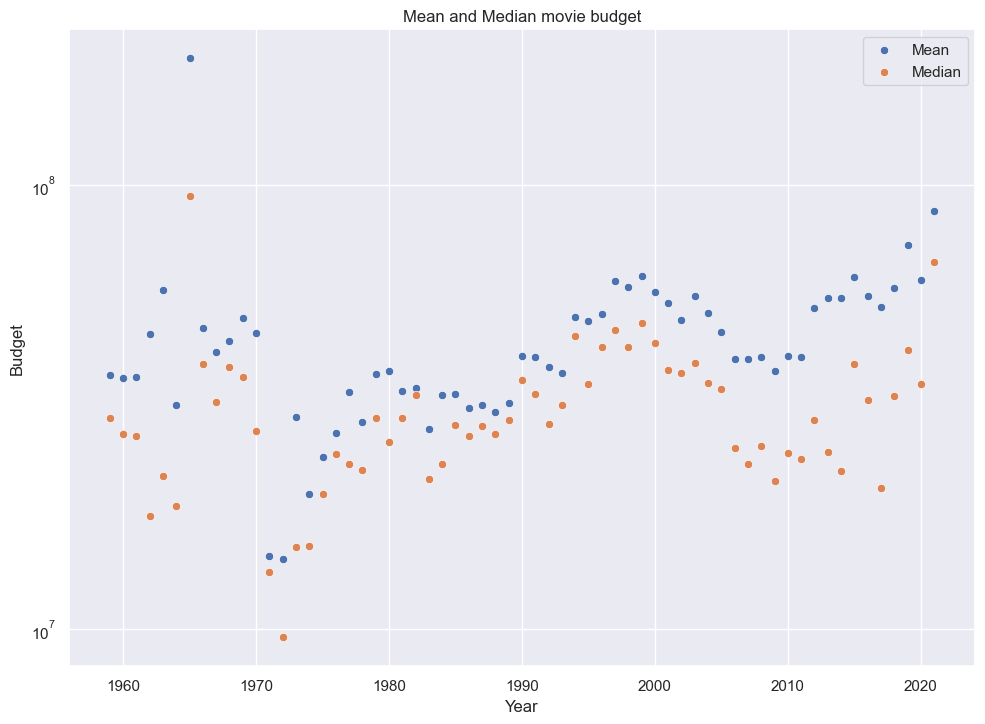

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(x=years_inflation, y=mean_budget_inflation,label='Mean')
splot = sns.scatterplot(x=years_inflation, y=median_budget_inflation,label='Median')
splot.set(yscale="log")
plt.title('Mean and Median movie budget')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.show()

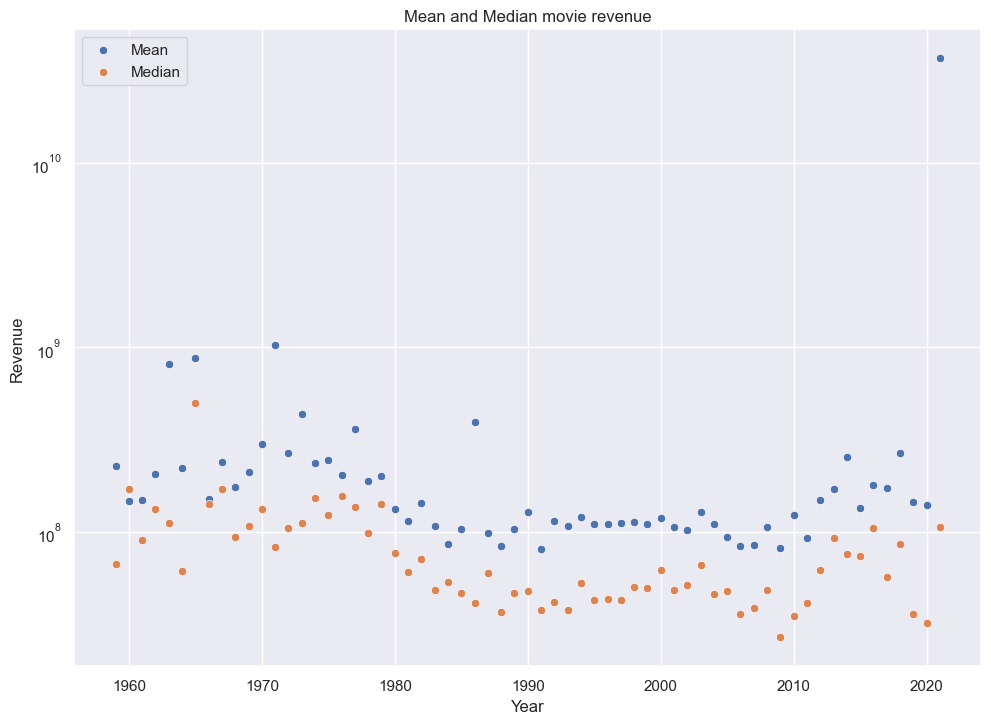

In [74]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(x=years_inflation, y=mean_revenue_inflation,label='Mean')
splot = sns.scatterplot(x=years_inflation, y=median_revenue_inflation,label='Median')
splot.set(yscale="log")
plt.title('Mean and Median movie revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

In [75]:
print(f'Pearson correlation between the mean of revenue and the mean of budget: {stats.pearsonr(mean_revenue_inflation,mean_budget_inflation)}')
print(f'Pearson correlation between the median of revenue and the median of budget: {stats.pearsonr(median_revenue_inflation,median_budget_inflation)}')

Pearson correlation between the mean of revenue and the mean of budget: (0.2413787628531989, 0.05667565728783349)
Pearson correlation between the median of revenue and the median of budget: (0.4214180215223112, 0.0005825398420519009)
